# Predicting Telecom Customer Churn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [78]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [80]:
### Remove Col CustomerID

In [81]:
df = df.iloc[:,1:]

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [83]:
### Check for null values

In [84]:
df.isnull()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


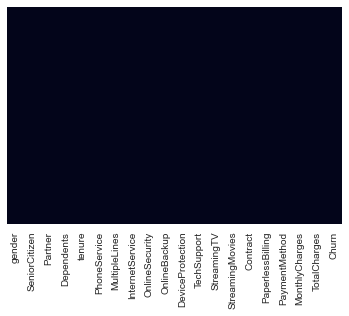

In [85]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [86]:
### On the surface, it doesnt appear that there are any null values.  However, we can get a more in-depth look by summing the total null values

In [87]:

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [88]:
### Total Charges has null values and is in a non-numeric form.  We can solve both issues.

In [89]:
### Change total charges to numeric values

In [90]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')


In [91]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Impute the missing TotalCharges values with the average.  We can also do so by looking at the mean for each Churn class and use that value to impute for the instances that pertain to each class

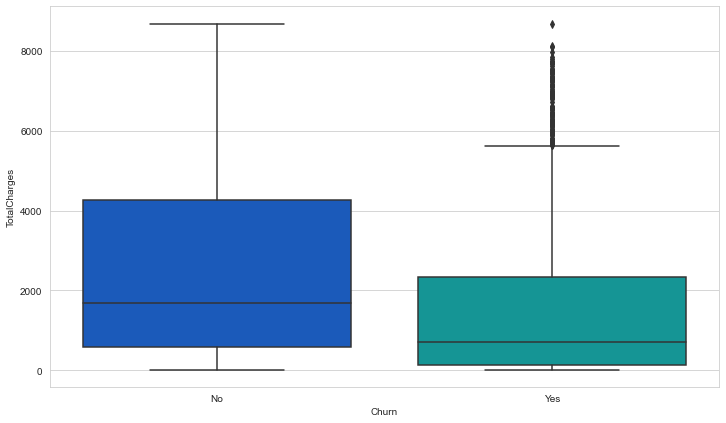

In [92]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Churn',y='TotalCharges',data=df,palette='winter')

In [93]:

### This function will identify the missing value and impute with the mean

def impute_TotalCharges(cols):
    TotalCharges = cols[0]
    Churn = cols[1]
    
    if pd.isnull(TotalCharges):
        
        if Churn == 'Yes':
            return 1000
        
        else:
            return 1750
        
    else: 
        return TotalCharges

In [94]:
df['TotalCharges'] = df[['TotalCharges','Churn']].apply(impute_TotalCharges,axis=1)

In [95]:
### Now we can check to see if those null values have been properly imputed

In [96]:

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Turn the Churn values into binary variables

In [97]:
df2 = df

In [98]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [99]:
### Convert all other categorical variables into binary

In [100]:
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [27]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   Churn                                    7043 non-null   int64  
 5   gender_Female                            7043 non-null   uint8  
 6   gender_Male                              7043 non-null   uint8  
 7   Partner_No                               7043 non-null   uint8  
 8   Partner_Yes                              7043 non-null   uint8  
 9   Dependents_No                            7043 non-null   uint8  
 10  Dependents_Yes                           7043 no

### Exploratory Analysis

C:\Users\ewing\anaconda33\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


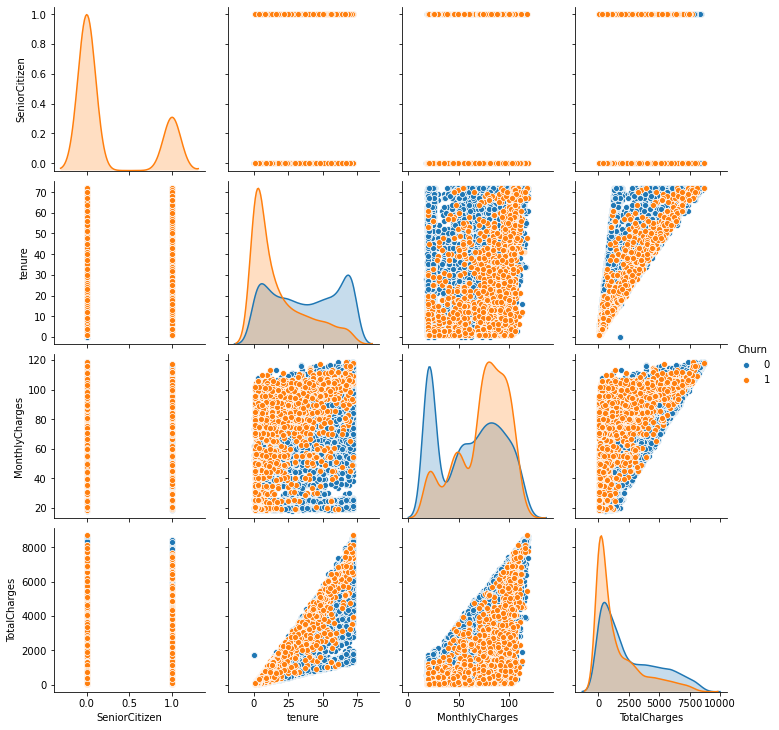

In [28]:
sns.pairplot(df,hue='Churn')

In [29]:
### From the pairplots, we see that customers with high charges are more likely to churn, customers that stay for longer periods of time are less likely to churn, and there appears to be a strong relationship between tenure and monthly charges

In [30]:
### Jointplot for tenure and monthly charges

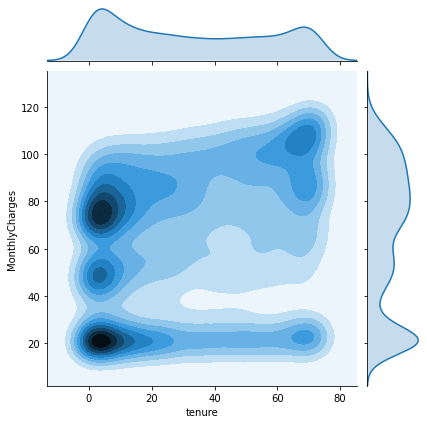

In [31]:
sns.jointplot(x='tenure',y='MonthlyCharges',data=df,kind='kde')

In [32]:

### What is the breakdown in monthly charges?

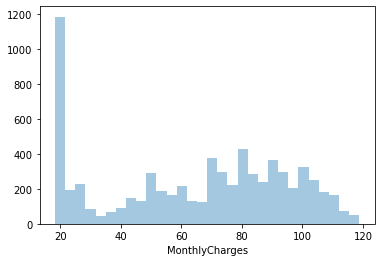

In [33]:
sns.distplot(df['MonthlyCharges'].dropna(),kde=False,bins=30)

In [34]:
### What does the typical customer tenure look like?

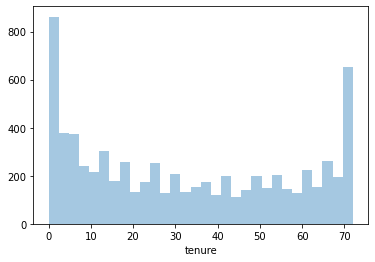

In [35]:
sns.distplot(df['tenure'].dropna(),kde=False,bins=30)

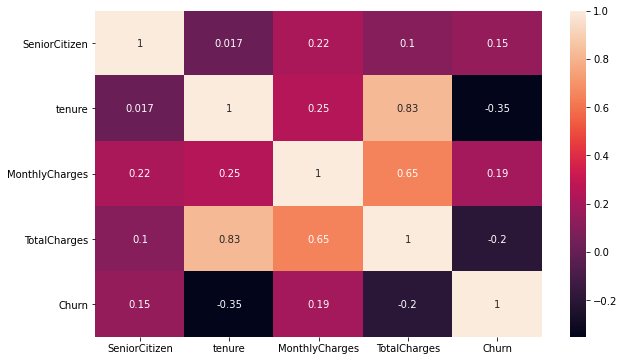

In [36]:
plt.figure(figsize=(10,6))
churn_corr = df.corr()
churn_corr_top = churn_corr.index
sns.heatmap(df[churn_corr_top].corr(), annot=True)

In [37]:
### How many customers in the dataset churned?

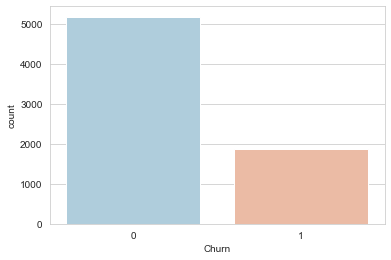

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',data=df,palette='RdBu_r')

Demographic analysis

In [39]:
### Breadown in Gender?

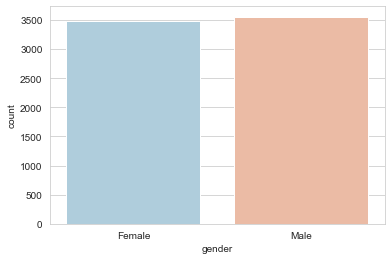

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='gender',data=df,palette='RdBu_r')

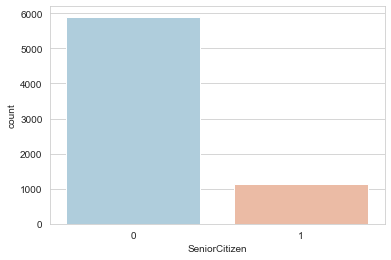

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='SeniorCitizen',data=df,palette='RdBu_r')

Analysis on plan usage

In [42]:
### How many customers have a phone service?


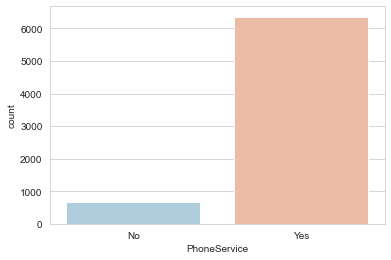

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='PhoneService',data=df,palette='RdBu_r')

In [44]:
### How are customers using their phone service?

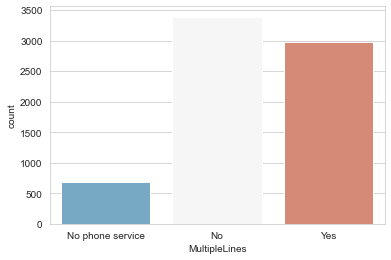

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='MultipleLines',data=df,palette='RdBu_r')

In [46]:
### How do most customers make their payments?

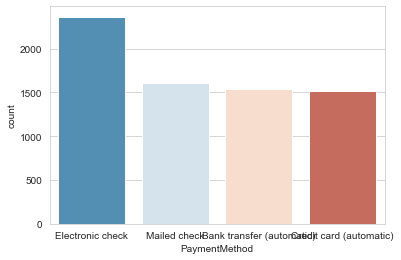

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='PaymentMethod',data=df,palette='RdBu_r')

### Exploratory Analysis Conclusions

## Logistic Regression

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

X_train, X_test, y_train, y_test = train_test_split(X,y,df_dummies['Churn'],
                                                    test_size=0.30)

ValueError: too many values to unpack (expected 4)

## KNN 

In [ ]:
### Create test and train sets and ensure features are properly scaled

In [101]:
### Standardize variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_dummies.drop('Churn',axis=1))

scaled_features = scaler.transform(df_dummies.drop('Churn',axis=1))



In [59]:
from sklearn.model_selection import train_test_split

In [60]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_dummies['Churn'],
                                                    test_size=0.30)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [63]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [64]:
pred = knn.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[1254  292]
 [ 294  273]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1546
           1       0.48      0.48      0.48       567

    accuracy                           0.72      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.72      0.72      0.72      2113



## Logistic Regression

In [66]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\ewing\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
### Predictions and Evaluations

In [71]:
predictions = logmodel.predict(X_test)

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1704
           1       0.69      0.53      0.60       621

    accuracy                           0.81      2325
   macro avg       0.76      0.72      0.74      2325
weighted avg       0.80      0.81      0.80      2325



In [105]:
from sklearn import metrics
predictions = logmodel.predict(X_test)


print (metrics.accuracy_score(y_test, predictions))

0.8103225806451613


In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(y_test,predictions)

array([[1553,  151],
       [ 290,  331]], dtype=int64)